# AI 5차 미니프로젝트_VOC 고객 해지 예측 모델링
#### 주제: VOC를 제기한 고객이 해지할 지 여부를 예측하는 머신러닝, 딥러닝 모델 구현
(본 파일과 관련 데이터 파일은 외부로 유출 불가합니다)
<br>

In [1]:
# 코드실행시 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

<br>

## **<span style="color:black">1. 필요한 라이브러리 설치</span>**

<Br>
<font color=blue>1-1. pip 이용해서 seaborn 설치하기</font>

In [2]:
# pip install seaborn

<br>
<font color=blue>1-2. numpy 별칭을 np로, pandas 별칭을 pd로 해서 임포트 하세요</font>

In [3]:
import numpy as np
import pandas as pd

<br>
<font color=blue>1-3. matplotlib 라이브러리를 plt로, seaborn을 sns로 해서 임포트 하세요

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<br>
<font color=blue>[참고] KT AIDU 플랫폼 [데이터Tab] 사용을 위한 AIDU 라이브러리 임포트 및 AIDU 연동 변수 설정

In [5]:
# KT AIDU 플랫폼 사용 시
#from aicentro.session import Session
#from aicentro.framework.keras import Keras as AiduFrm

#aidu_session = Session(verify=False)
#aidu_framework = AiduFrm(session=aidu_session)

<br>

## **<span style="color:black">2. Tabular 데이터 로딩</span>**

<br>
<font color=blue>[참고] KT AIDU 플랫폼 [데이터Tab] 사용 시 디렉토리 확인

In [6]:
# aidu_framework.config.data_dir 내용 확인
#aidu_framework.config.data_dir

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>
<font color=blue>2-1. pandas read_csv 함수를 사용하여 voc_data.csv 파일 읽어오세요. (df에 저장하세요)</font>

In [8]:
df = pd.read_csv("/content/drive/MyDrive/AIVLE/4월/mini5/AI 5차 미니프로젝트_실습자료/voc_data.csv")

In [9]:
df.head()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,_,1000665328,2153,10009,10002,_,F,1000001126,36,10001,...,0,_,10001,_,_,99991231,N,_,0,N
1,_,1001028714,3311,10009,10002,10081,G,1000852226,32,10001,...,0,_,10001,15098,15244,20220319,N,_,0,N
2,_,1001028567,1575,10009,10002,_,G,1000851875,52,10001,...,0,10268,10001,15097,15244,20220508,N,N,0,N
3,10000,1000665328,3546,10009,10002,_,_,1000001126,_,10001,...,0,_,10001,_,_,99991231,N,_,0,N
4,_,1000779276,3086,10009,10002,_,G,1000764639,50,10001,...,0,_,10001,_,_,99991231,N,_,0,N


<br>
<font color=blue>[참고] KT AIDU 플랫폼 [데이터Tab]에서 파일을 읽어올 경우: pandas read_csv 함수를 사용하여 voc_data.csv 파일 읽어오세요</font>

In [10]:
# AIDU 파일 저장 위치 변수 : aidu_framework.config.data_dir
# 읽어올 파일명 : voc_data.csv
# 읽어온 파일을 DataFrame "df" 이름으로 저장

#df = pd.read_csv(aidu_framework.config.data_dir + '/voc_data.csv')



<br>

## **<span style="color:black">3. 데이터의 구성 확인</span>**

<br>
<font color=blue>3-1. "df" DataFrame 이용해서 읽어들인 파일의 앞부분 5줄, 뒷부분 5줄을 출력하세요</font>

In [11]:
# 앞부분 5줄 출력
df.head()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,_,1000665328,2153,10009,10002,_,F,1000001126,36,10001,...,0,_,10001,_,_,99991231,N,_,0,N
1,_,1001028714,3311,10009,10002,10081,G,1000852226,32,10001,...,0,_,10001,15098,15244,20220319,N,_,0,N
2,_,1001028567,1575,10009,10002,_,G,1000851875,52,10001,...,0,10268,10001,15097,15244,20220508,N,N,0,N
3,10000,1000665328,3546,10009,10002,_,_,1000001126,_,10001,...,0,_,10001,_,_,99991231,N,_,0,N
4,_,1000779276,3086,10009,10002,_,G,1000764639,50,10001,...,0,_,10001,_,_,99991231,N,_,0,N


In [12]:
# 뒷부분 5줄 출력
df.tail()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
9995,_,1000811136,2123,10009,10002,_,G,1000809259,17,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9996,_,1001047799,2153,10009,10002,_,I,1001046521,35,10001,...,0,_,10001,_,_,99991231,N,_,0,N
9997,_,1001027819,379,10009,10002,_,G,1000720809,51,10001,...,0,10270,10001,15097,15244,20180903,N,N,0,N
9998,_,1001027819,314,10009,10002,_,I,1000720809,_,10001,...,0,_,10001,15097,15244,20210412,N,_,0,N
9999,_,1001047802,2266,10009,10002,_,G,1001046524,27,10001,...,0,_,10001,_,_,99991231,N,_,0,N


<br>
<font color=blue>3-2. 데이터프레임 정보(컬럼정보, Null 여부, 타입) 출력하세요</font>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   voc_trt_perd_itg_cd             10000 non-null  object
 1   voc_prod_sbt_id                 10000 non-null  int64 
 2   voc_wjt_sorc_id                 10000 non-null  int64 
 3   voc_type_itg_cd                 10000 non-null  int64 
 4   voc_sttus_itg_cd                10000 non-null  int64 
 5   voc_trt_reslt_itg_cd            10000 non-null  object
 6   cust_clas_itg_cd                10000 non-null  object
 7   bprod_sbt_id                    10000 non-null  int64 
 8   age_itg_cd                      10000 non-null  object
 9   cont_sttus_itg_cd               10000 non-null  object
 10  new_date                        10000 non-null  int64 
 11  opn_nfl_chg_date                10000 non-null  int64 
 12  cust_dtl_ctg_itg_cd             10000 non-null 

In [14]:
df.describe()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
count,1.000000e+04,10000.00000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000
mean,9.907267e+08,1578.29170,10008.52360,10002.043400,8.838173e+08,1.744283e+07,1.744505e+07,20001.074200,0.008800,10002.656800,7.004469e+07,193.88010
std,1.005780e+08,1078.63717,1.57927,0.314843,3.214229e+08,6.849207e+06,6.850077e+06,0.262109,0.103555,6.576864,3.863802e+07,6970.03853
min,-9.980000e+02,126.00000,10003.00000,10002.000000,-9.980000e+02,1.010100e+04,1.010100e+04,20001.000000,0.000000,10001.000000,2.001063e+07,0.00000
25%,1.000782e+09,360.00000,10009.00000,10002.000000,1.000003e+09,2.008053e+07,2.008123e+07,20001.000000,0.000000,10001.000000,2.021102e+07,0.00000
50%,1.001028e+09,2056.00000,10009.00000,10002.000000,1.000749e+09,2.014121e+07,2.015031e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
75%,1.001036e+09,2153.00000,10009.00000,10002.000000,1.001044e+09,2.018010e+07,2.018032e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.00000
max,1.001079e+09,3856.00000,10017.00000,10005.000000,1.001078e+09,2.020041e+07,2.020041e+07,20002.000000,3.000000,10038.000000,9.999123e+07,367991.00000


In [15]:
df.isnull().sum()

voc_trt_perd_itg_cd               0
voc_prod_sbt_id                   0
voc_wjt_sorc_id                   0
voc_type_itg_cd                   0
voc_sttus_itg_cd                  0
voc_trt_reslt_itg_cd              0
cust_clas_itg_cd                  0
bprod_sbt_id                      0
age_itg_cd                        0
cont_sttus_itg_cd                 0
new_date                          0
opn_nfl_chg_date                  0
cust_dtl_ctg_itg_cd               0
voc_trt_degr_div_itg_cd           0
voc_dupl_tmscnt                   0
oos_cause_type_itg_cd             0
voc_trt_need_time_itg_cd          0
engt_cperd_type_itg_cd            0
engt_tgt_div_itg_cd               0
cont_fns_pam_date                 0
voc_mis_pbls_yn                   0
fclt_oos_yn                       0
cust_snsry_base_conf_need_time    0
trm_yn                            0
dtype: int64

In [16]:
df.corr()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
voc_prod_sbt_id,1.000000,-0.002748,0.290757,0.001300,-0.036703,-0.007356,-0.007351,-0.035885,-0.000949,-0.056079,0.062492,0.002837
voc_wjt_sorc_id,-0.002748,1.000000,0.012150,-0.010367,-0.104248,-0.088880,-0.088884,0.021118,0.058878,-0.000510,0.012683,-0.010329
voc_type_itg_cd,0.290757,0.012150,1.000000,-0.060189,-0.098566,-0.093611,-0.093567,-0.132040,0.001176,-0.145191,0.209263,0.036515
voc_sttus_itg_cd,0.001300,-0.010367,-0.060189,1.000000,0.011576,0.001649,0.001690,0.209413,-0.005580,0.740842,0.015004,-0.003834
bprod_sbt_id,-0.036703,-0.104248,-0.098566,0.011576,1.000000,0.925626,0.925627,0.023361,0.030894,0.014778,-0.281849,0.009978
new_date,-0.007356,-0.088880,-0.093611,0.001649,0.925626,1.000000,0.999998,-0.036729,0.027811,-0.005271,-0.222735,0.010881
opn_nfl_chg_date,-0.007351,-0.088884,-0.093567,0.001690,0.925627,0.999998,1.000000,-0.036760,0.027831,-0.005271,-0.222691,0.010875
voc_trt_degr_div_itg_cd,-0.035885,0.021118,-0.132040,0.209413,0.023361,-0.036729,-0.036760,1.000000,0.012787,0.441128,-0.047666,0.098260
voc_dupl_tmscnt,-0.000949,0.058878,0.001176,-0.005580,0.030894,0.027811,0.027831,0.012787,1.000000,-0.004963,-0.079721,-0.002363
voc_trt_need_time_itg_cd,-0.056079,-0.000510,-0.145191,0.740842,0.014778,-0.005271,-0.005271,0.441128,-0.004963,1.000000,-0.032120,0.047773


<br>
<font color=blue>3-3. 데이터프레임 인덱스를 확인하세요</font>

In [17]:
df.index

RangeIndex(start=0, stop=10000, step=1)

<br>
<font color=blue>3-4. 데이터프레임 컬럼을 확인하세요</font>

In [18]:
df.columns

Index(['voc_trt_perd_itg_cd', 'voc_prod_sbt_id', 'voc_wjt_sorc_id',
       'voc_type_itg_cd', 'voc_sttus_itg_cd', 'voc_trt_reslt_itg_cd',
       'cust_clas_itg_cd', 'bprod_sbt_id', 'age_itg_cd', 'cont_sttus_itg_cd',
       'new_date', 'opn_nfl_chg_date', 'cust_dtl_ctg_itg_cd',
       'voc_trt_degr_div_itg_cd', 'voc_dupl_tmscnt', 'oos_cause_type_itg_cd',
       'voc_trt_need_time_itg_cd', 'engt_cperd_type_itg_cd',
       'engt_tgt_div_itg_cd', 'cont_fns_pam_date', 'voc_mis_pbls_yn',
       'fclt_oos_yn', 'cust_snsry_base_conf_need_time', 'trm_yn'],
      dtype='object')

<br>
<font color=blue>3-5. 데이터프레임 값(value)을 확인하세요</font>

In [19]:
df.values

array([['_', 1000665328, 2153, ..., '_', 0, 'N'],
       ['_', 1001028714, 3311, ..., '_', 0, 'N'],
       ['_', 1001028567, 1575, ..., 'N', 0, 'N'],
       ...,
       ['_', 1001027819, 379, ..., 'N', 0, 'N'],
       ['_', 1001027819, 314, ..., '_', 0, 'N'],
       ['_', 1001047802, 2266, ..., '_', 0, 'N']], dtype=object)

<br>
<font color=blue>3-6. 데이터프레임의 계산 가능한 값들에 대한 통계치를 확인하세요</font>

In [20]:
df.corr()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
voc_prod_sbt_id,1.000000,-0.002748,0.290757,0.001300,-0.036703,-0.007356,-0.007351,-0.035885,-0.000949,-0.056079,0.062492,0.002837
voc_wjt_sorc_id,-0.002748,1.000000,0.012150,-0.010367,-0.104248,-0.088880,-0.088884,0.021118,0.058878,-0.000510,0.012683,-0.010329
voc_type_itg_cd,0.290757,0.012150,1.000000,-0.060189,-0.098566,-0.093611,-0.093567,-0.132040,0.001176,-0.145191,0.209263,0.036515
voc_sttus_itg_cd,0.001300,-0.010367,-0.060189,1.000000,0.011576,0.001649,0.001690,0.209413,-0.005580,0.740842,0.015004,-0.003834
bprod_sbt_id,-0.036703,-0.104248,-0.098566,0.011576,1.000000,0.925626,0.925627,0.023361,0.030894,0.014778,-0.281849,0.009978
new_date,-0.007356,-0.088880,-0.093611,0.001649,0.925626,1.000000,0.999998,-0.036729,0.027811,-0.005271,-0.222735,0.010881
opn_nfl_chg_date,-0.007351,-0.088884,-0.093567,0.001690,0.925627,0.999998,1.000000,-0.036760,0.027831,-0.005271,-0.222691,0.010875
voc_trt_degr_div_itg_cd,-0.035885,0.021118,-0.132040,0.209413,0.023361,-0.036729,-0.036760,1.000000,0.012787,0.441128,-0.047666,0.098260
voc_dupl_tmscnt,-0.000949,0.058878,0.001176,-0.005580,0.030894,0.027811,0.027831,0.012787,1.000000,-0.004963,-0.079721,-0.002363
voc_trt_need_time_itg_cd,-0.056079,-0.000510,-0.145191,0.740842,0.014778,-0.005271,-0.005271,0.441128,-0.004963,1.000000,-0.032120,0.047773


<br>
<font color=blue>3-7. DataFrame 컬럼 항목에 Null 존재하는지 확인하세요. (null값의 합계 포함)</font>

In [21]:
df.isnull().sum()

voc_trt_perd_itg_cd               0
voc_prod_sbt_id                   0
voc_wjt_sorc_id                   0
voc_type_itg_cd                   0
voc_sttus_itg_cd                  0
voc_trt_reslt_itg_cd              0
cust_clas_itg_cd                  0
bprod_sbt_id                      0
age_itg_cd                        0
cont_sttus_itg_cd                 0
new_date                          0
opn_nfl_chg_date                  0
cust_dtl_ctg_itg_cd               0
voc_trt_degr_div_itg_cd           0
voc_dupl_tmscnt                   0
oos_cause_type_itg_cd             0
voc_trt_need_time_itg_cd          0
engt_cperd_type_itg_cd            0
engt_tgt_div_itg_cd               0
cont_fns_pam_date                 0
voc_mis_pbls_yn                   0
fclt_oos_yn                       0
cust_snsry_base_conf_need_time    0
trm_yn                            0
dtype: int64

<br>
<font color=blue>3-8. voc_trt_perd_itg_cd 컬럼 데이터를 확인하세요</font>

In [22]:
df['voc_trt_perd_itg_cd'].describe()

count     10000
unique       17
top           _
freq       5422
Name: voc_trt_perd_itg_cd, dtype: object

<br>
<font color=blue>3-9. voc_trt_perd_itg_cd 컬럼 데이터별 건수를 나열하세요</font>

In [23]:
df['voc_trt_perd_itg_cd'].describe()

count     10000
unique       17
top           _
freq       5422
Name: voc_trt_perd_itg_cd, dtype: object

In [24]:
# [참고]voc_trt_perd_itg_cd 컬럼 데이터별 건수 비율 보기
df['voc_trt_perd_itg_cd'].value_counts(normalize=True)

_        0.5422
10000    0.4283
10001    0.0163
10002    0.0058
10003    0.0025
10004    0.0016
10005    0.0010
10006    0.0006
10008    0.0003
10009    0.0003
10016    0.0002
10011    0.0002
10012    0.0002
10007    0.0002
10014    0.0001
10013    0.0001
10015    0.0001
Name: voc_trt_perd_itg_cd, dtype: float64

<br>
<font color=blue>3-10. 모든 컬럼에 대한 데이터 분포 건수를 확인하세요.</font>

In [25]:
def ub_counter(df, num):
    for i in list(df):
        if (df.loc[df[i] == '_'].value_counts().sum())/len(df[i])*100 > num:
            print(f"{i}: {df.loc[df[i] == '_'].value_counts().sum()} // {(df.loc[df[i] == '_'].value_counts().sum())/len(df[i])*100}%")

In [26]:
# for i in list(df):
#     if (df.loc[df[i] == '_'].value_counts().sum())/len(df[i])*100 != 0.0:
#         print(f"{i}: {df.loc[df[i] == '_'].value_counts().sum()} // {(df.loc[df[i] == '_'].value_counts().sum())/len(df[i])*100}%")
ub_counter(df, 0)

voc_trt_perd_itg_cd: 5422 // 54.22%
voc_trt_reslt_itg_cd: 8857 // 88.57000000000001%
cust_clas_itg_cd: 1934 // 19.34%
age_itg_cd: 2129 // 21.29%
cont_sttus_itg_cd: 1168 // 11.68%
cust_dtl_ctg_itg_cd: 1168 // 11.68%
oos_cause_type_itg_cd: 9008 // 90.08%
engt_cperd_type_itg_cd: 6264 // 62.63999999999999%
engt_tgt_div_itg_cd: 6264 // 62.63999999999999%
voc_mis_pbls_yn: 86 // 0.86%
fclt_oos_yn: 8988 // 89.88000000000001%


In [27]:
# 비율로 확인
[df[c].value_counts(normalize=True) for c in df]   

[_        0.5422
 10000    0.4283
 10001    0.0163
 10002    0.0058
 10003    0.0025
 10004    0.0016
 10005    0.0010
 10006    0.0006
 10008    0.0003
 10009    0.0003
 10016    0.0002
 10011    0.0002
 10012    0.0002
 10007    0.0002
 10014    0.0001
 10013    0.0001
 10015    0.0001
 Name: voc_trt_perd_itg_cd, dtype: float64,
 1001027747    0.1426
 1000665328    0.0998
 1001027746    0.0477
 1001047801    0.0408
 1001044841    0.0398
                ...  
 1001069182    0.0001
 1000667452    0.0001
 1000781560    0.0001
 1000711760    0.0001
 1001056085    0.0001
 Name: voc_prod_sbt_id, Length: 562, dtype: float64,
 2153    0.1951
 329     0.0369
 656     0.0336
 3086    0.0325
 128     0.0325
          ...  
 1900    0.0001
 3524    0.0001
 3383    0.0001
 3331    0.0001
 1727    0.0001
 Name: voc_wjt_sorc_id, Length: 473, dtype: float64,
 10009    0.8847
 10003    0.0693
 10007    0.0392
 10011    0.0061
 10017    0.0007
 Name: voc_type_itg_cd, dtype: float64,
 10002    0.9758
 

### 컬럼에서  '_' 값이 차지하는 비율
- voc_trt_perd_itg_cd : 0.54
- voc_trt_reslt_itg_cd : 0.88
- oos_cause_type_itg_cd : 0.9
- engt_cperd_type_itg_cd : 0.63
- engt_tgt_div_itg_cd : 0.63
- fclt_oos_yn : 0.90  
- cust_clas_itg_cd : 0.2
- age_itg_cd : 0.22
- cont_sttus_itg_cd : 0.11
- cust_dtl_ctg_itg_cd : 0.11
- voc_mis_pbls_yn : 0.008


## **<span style="color:black">4. 데이터 결측치 처리</span>**

<br>
<font color=blue>4-1. '_' 값이 50% 이상 차지하는 voc_trt_perd_itg_cd 컬럼 삭제하세요. (df는 그대로 두고, 컬럼이 삭제된 데이터를 df1에 저장하세요)</font>

In [28]:
df1 = df.copy()

In [29]:
to_delete = []
for i in list(df1):
        if (df1.loc[df[i] == '_'].value_counts().sum())/len(df1[i])*100 > 50:
            to_delete.append(i)
to_delete

['voc_trt_perd_itg_cd',
 'voc_trt_reslt_itg_cd',
 'oos_cause_type_itg_cd',
 'engt_cperd_type_itg_cd',
 'engt_tgt_div_itg_cd',
 'fclt_oos_yn']

In [30]:
# voc_trt_perd_itg_cd 컬럼 삭제 결과를 "df1" DataFrame 저장
for col in to_delete:
    df1.drop(col, axis=1, inplace=True)
df1.head()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,new_date,opn_nfl_chg_date,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,10001,19881005,19881005,10003,20001,0,10001,99991231,N,0,N
1,1001028714,3311,10009,10002,G,1000852226,32,10001,20130817,20130817,10002,20001,0,10001,20220319,N,0,N
2,1001028567,1575,10009,10002,G,1000851875,52,10001,20190509,20190509,10003,20001,0,10001,20220508,N,0,N
3,1000665328,3546,10009,10002,_,1000001126,_,10001,20190731,20190731,90024,20001,0,10001,99991231,N,0,N
4,1000779276,3086,10009,10002,G,1000764639,50,10001,20180403,20180403,90024,20001,0,10001,99991231,N,0,N


In [31]:
to_delete

['voc_trt_perd_itg_cd',
 'voc_trt_reslt_itg_cd',
 'oos_cause_type_itg_cd',
 'engt_cperd_type_itg_cd',
 'engt_tgt_div_itg_cd',
 'fclt_oos_yn']

<br>
<font color=blue>4-2. 'df1' DataFrame에서 '_' 값이 50% 이상되는 나머지 컬럼도 삭제하세요</font>

In [32]:
# 위의 drop 함수 사용한 결과와 동일. 하지만 사용방법이 약간 다름
# df1 = df.drop(['voc_trt_reslt_itg_cd',
#                'oos_cause_type_itg_cd',
#                'engt_cperd_type_itg_cd',
#                'engt_tgt_div_itg_cd',
#                'fclt_oos_yn'
#                ], axis=1)

<br>
<font color=blue>4-3. 'df1' DataFrame의 'cust_clas_itg_cd' 컬럼에 '_' 값이 있는지 확인하세요 </font>

In [33]:
df1['cust_clas_itg_cd'].value_counts()

L    2769
_    1934
G    1777
I    1266
J    1071
F     903
O     275
H       4
M       1
Name: cust_clas_itg_cd, dtype: int64

<br>
<font color=blue>4-4. 남아있는 '_'값을 null로 변경: DataFrame replace 함수를 사용해서 모든 컬럼에 대해 '_'값을 null로 변경하세요. (df1 원본을 변경)</font>

In [34]:
df1.replace('_', None, inplace=True)

In [35]:
df1

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,new_date,opn_nfl_chg_date,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,10001,19881005,19881005,10003,20001,0,10001,99991231,N,0,N
1,1001028714,3311,10009,10002,G,1000852226,32,10001,20130817,20130817,10002,20001,0,10001,20220319,N,0,N
2,1001028567,1575,10009,10002,G,1000851875,52,10001,20190509,20190509,10003,20001,0,10001,20220508,N,0,N
3,1000665328,3546,10009,10002,None,1000001126,None,10001,20190731,20190731,90024,20001,0,10001,99991231,N,0,N
4,1000779276,3086,10009,10002,G,1000764639,50,10001,20180403,20180403,90024,20001,0,10001,99991231,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000811136,2123,10009,10002,G,1000809259,17,10001,20180313,20180313,10003,20001,0,10001,99991231,N,0,N
9996,1001047799,2153,10009,10002,I,1001046521,35,10001,20141208,20181130,10003,20001,0,10001,99991231,N,0,N
9997,1001027819,379,10009,10002,G,1000720809,51,10001,20150904,20150904,90029,20001,0,10001,20180903,N,0,N
9998,1001027819,314,10009,10002,I,1000720809,None,10001,20160206,20160206,90029,20001,0,10001,20210412,N,0,N


In [36]:
type(df1)

pandas.core.frame.DataFrame

<br>
<font color=blue>4-5. 컬럼별 Null 갯수를 확인해보세요.</font>

In [37]:
df1.isnull().sum()

voc_prod_sbt_id                      0
voc_wjt_sorc_id                      0
voc_type_itg_cd                      0
voc_sttus_itg_cd                     0
cust_clas_itg_cd                  1934
bprod_sbt_id                         0
age_itg_cd                        2129
cont_sttus_itg_cd                 1168
new_date                             0
opn_nfl_chg_date                     0
cust_dtl_ctg_itg_cd               1168
voc_trt_degr_div_itg_cd              0
voc_dupl_tmscnt                      0
voc_trt_need_time_itg_cd             0
cont_fns_pam_date                    0
voc_mis_pbls_yn                     86
cust_snsry_base_conf_need_time       0
trm_yn                               0
dtype: int64

In [38]:
type(df1)

pandas.core.frame.DataFrame

###  Object 데이터타입의 Null값 처리
- cust_clas_itg_cd 
- age_itg_cd
- cont_sttus_itg_cd
- cust_dtl_ctg_itg_cd
- voc_mis_pbls_yn

<br>
<font color=blue>4-6. df1 데이터프레임 컬럼들의 데이터타입을 확인하세요.</font>

In [39]:
for i in list(df1):
    print(f"{i}: {df1[i].dtypes}, {df1[i].isnull().sum()}")

voc_prod_sbt_id: int64, 0
voc_wjt_sorc_id: int64, 0
voc_type_itg_cd: int64, 0
voc_sttus_itg_cd: int64, 0
cust_clas_itg_cd: object, 1934
bprod_sbt_id: int64, 0
age_itg_cd: object, 2129
cont_sttus_itg_cd: object, 1168
new_date: int64, 0
opn_nfl_chg_date: int64, 0
cust_dtl_ctg_itg_cd: object, 1168
voc_trt_degr_div_itg_cd: int64, 0
voc_dupl_tmscnt: int64, 0
voc_trt_need_time_itg_cd: int64, 0
cont_fns_pam_date: int64, 0
voc_mis_pbls_yn: object, 86
cust_snsry_base_conf_need_time: int64, 0
trm_yn: object, 0


In [40]:
type(df1)

pandas.core.frame.DataFrame

<br>
<font color=blue>4-7. 'cust_clas_itg_cd' 컬럼의 값중에 Null을 컬럼의 최빈값으로 변경하세요(fillna 함수 사용)</font>

In [41]:
most = df1['cust_clas_itg_cd'].value_counts().idxmax()
most

'L'

In [42]:
type(df1)

pandas.core.frame.DataFrame

In [43]:
# # cust_clas_itg_cd 컬럼에 대한 값 분포 확인
df1['cust_clas_itg_cd'] = df1['cust_clas_itg_cd'].fillna(most)
print(df1['cust_clas_itg_cd'].value_counts())

L    4703
G    1777
I    1266
J    1071
F     903
O     275
H       4
M       1
Name: cust_clas_itg_cd, dtype: int64


In [44]:
# DataFrame의 fillna() 함수 사용


In [45]:
# fillna 대신 replace함수 사용하여 처리해도 됨.
#df1['cust_clas_itg_cd'].replace(np.nan, 'L', inplace=True)

<br>
<font color=blue>4-8. 'age_itg_cd'의 null 값을 중앙값(median)으로 변경하고 데이터 타입을 정수(int)로 변경하세요.</font>

In [46]:
df1

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,new_date,opn_nfl_chg_date,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,10001,19881005,19881005,10003,20001,0,10001,99991231,N,0,N
1,1001028714,3311,10009,10002,G,1000852226,32,10001,20130817,20130817,10002,20001,0,10001,20220319,N,0,N
2,1001028567,1575,10009,10002,G,1000851875,52,10001,20190509,20190509,10003,20001,0,10001,20220508,N,0,N
3,1000665328,3546,10009,10002,L,1000001126,None,10001,20190731,20190731,90024,20001,0,10001,99991231,N,0,N
4,1000779276,3086,10009,10002,G,1000764639,50,10001,20180403,20180403,90024,20001,0,10001,99991231,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000811136,2123,10009,10002,G,1000809259,17,10001,20180313,20180313,10003,20001,0,10001,99991231,N,0,N
9996,1001047799,2153,10009,10002,I,1001046521,35,10001,20141208,20181130,10003,20001,0,10001,99991231,N,0,N
9997,1001027819,379,10009,10002,G,1000720809,51,10001,20150904,20150904,90029,20001,0,10001,20180903,N,0,N
9998,1001027819,314,10009,10002,I,1000720809,None,10001,20160206,20160206,90029,20001,0,10001,20210412,N,0,N


In [47]:
# 중앙값(median) 확인
med = df1['age_itg_cd'].median()
df1['age_itg_cd'] = df1['age_itg_cd'].fillna(med)
# df1['age_itg_cd'].value_counts()

In [48]:
df1.isnull().sum()

voc_prod_sbt_id                      0
voc_wjt_sorc_id                      0
voc_type_itg_cd                      0
voc_sttus_itg_cd                     0
cust_clas_itg_cd                     0
bprod_sbt_id                         0
age_itg_cd                           0
cont_sttus_itg_cd                 1168
new_date                             0
opn_nfl_chg_date                     0
cust_dtl_ctg_itg_cd               1168
voc_trt_degr_div_itg_cd              0
voc_dupl_tmscnt                      0
voc_trt_need_time_itg_cd             0
cont_fns_pam_date                    0
voc_mis_pbls_yn                     86
cust_snsry_base_conf_need_time       0
trm_yn                               0
dtype: int64

In [49]:
df1['age_itg_cd'] = df1['age_itg_cd'].astype(int)

In [50]:
# 'age_itg_cd'의 null 값을 중앙값(median)으로 변경


In [51]:
# 데이터 타입을 정수(int)로 변경



<br>
<font color=blue>4-9. 'cont_sttus_itg_cd'의 null 값을 최빈값(mode)으로 변경하세요</font>

In [52]:
df1['cont_sttus_itg_cd'].mode()

0    10001
Name: cont_sttus_itg_cd, dtype: object

In [53]:
# 최빈값(mode) 확인
df1['cont_sttus_itg_cd'] = df1['cont_sttus_itg_cd'].fillna(df1['cont_sttus_itg_cd'].mode())

df1['cont_sttus_itg_cd'].value_counts()

10001    7843
10005     552
10003     174
10007     169
10002      65
10006      25
10004       4
Name: cont_sttus_itg_cd, dtype: int64

In [54]:
#'cont_sttus_itg_cd'의 null 값을 최빈값(mode)으로 변경


<br>
<font color=blue>4-10. 'cust_dtl_ctg_itg_cd'의 null 값을 최빈값(mode)으로 변경하세요</font>

In [55]:
# 최빈값(mode) 확인
df1['cust_dtl_ctg_itg_cd'].mode()

0    10003
Name: cust_dtl_ctg_itg_cd, dtype: object

In [56]:
# 'cust_dtl_ctg_itg_cd'의 null 값을 최빈값(mode)으로 변경

df1['cust_dtl_ctg_itg_cd'] = df1['cust_dtl_ctg_itg_cd'].fillna(df1['cust_dtl_ctg_itg_cd'].mode())

df1['cust_dtl_ctg_itg_cd'].value_counts()

10003    5171
10002    1329
90029    1160
10019     389
90056     368
90027     217
90024     119
10018      25
10011      25
90030      24
10001       4
10004       1
Name: cust_dtl_ctg_itg_cd, dtype: int64

<br>
<font color=blue>4-11. 'voc_mis_pbls_yn' 컬럼의 경우 'N' 값이 99% 이상 차지하므로 삭제하세요.</font>

In [57]:
df1['voc_mis_pbls_yn'].value_counts()

N    9914
Name: voc_mis_pbls_yn, dtype: int64

In [58]:
df1.drop('voc_mis_pbls_yn', axis=1, inplace=True)

<br>
<font color=blue>4-12. 다음 날짜 관련 컬럼을 확인 후 삭제하세요. (날짜 관련 컬럼: new_date, opn_nfl_chg_date, cont_fns_pam_date)</font>

In [59]:
date = ["new_date", "opn_nfl_chg_date", "cont_fns_pam_date"]
for i in date:
    print(f"{i}==\n{df1[i].value_counts()}")

new_date==
10101       1337
20200410     138
20200409      51
20200407      23
20200408      18
            ... 
20150722       1
19880109       1
19890425       1
20080818       1
20110804       1
Name: new_date, Length: 3854, dtype: int64
opn_nfl_chg_date==
10101       1337
20200410     168
20200409      54
20200408      25
20200407      24
            ... 
20020925       1
20130304       1
19880109       1
19890425       1
20110804       1
Name: opn_nfl_chg_date, Length: 3786, dtype: int64
cont_fns_pam_date==
99991231    6247
20230409     194
20230412      55
20230410      35
20230408      28
            ... 
20210309       1
20170322       1
20220720       1
20161229       1
20180903       1
Name: cont_fns_pam_date, Length: 1839, dtype: int64


In [60]:
for i in date:
    df1.drop(i, axis=1, inplace=True)
list(df1)

['voc_prod_sbt_id',
 'voc_wjt_sorc_id',
 'voc_type_itg_cd',
 'voc_sttus_itg_cd',
 'cust_clas_itg_cd',
 'bprod_sbt_id',
 'age_itg_cd',
 'cont_sttus_itg_cd',
 'cust_dtl_ctg_itg_cd',
 'voc_trt_degr_div_itg_cd',
 'voc_dupl_tmscnt',
 'voc_trt_need_time_itg_cd',
 'cust_snsry_base_conf_need_time',
 'trm_yn']

In [61]:
df1.head()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,10001,10003,20001,0,10001,0,N
1,1001028714,3311,10009,10002,G,1000852226,32,10001,10002,20001,0,10001,0,N
2,1001028567,1575,10009,10002,G,1000851875,52,10001,10003,20001,0,10001,0,N
3,1000665328,3546,10009,10002,L,1000001126,49,10001,90024,20001,0,10001,0,N
4,1000779276,3086,10009,10002,G,1000764639,50,10001,90024,20001,0,10001,0,N


<br>

## **<span style="color:black">5. 라벨 인코딩, 원핫 인코딩</span>**

<br>
<font color=blue>5-1. object 타입 컬럼을 별도 dataframe에 저장해보세요. 그 중 cust_clas_itg_cd 컬럼에 대해 LabelEncoder를 적용해보세요. (적용 후 df1에 저장)</font>

In [62]:
#컬럼 타입 object를 별도 dataframe에 저장
obj_list = []
for i in list(df1):
    print(f"{i}: {df1[i].dtypes}")
    if df1[i].dtypes == object:
        obj_list.append(i)

voc_prod_sbt_id: int64
voc_wjt_sorc_id: int64
voc_type_itg_cd: int64
voc_sttus_itg_cd: int64
cust_clas_itg_cd: object
bprod_sbt_id: int64
age_itg_cd: int64
cont_sttus_itg_cd: object
cust_dtl_ctg_itg_cd: object
voc_trt_degr_div_itg_cd: int64
voc_dupl_tmscnt: int64
voc_trt_need_time_itg_cd: int64
cust_snsry_base_conf_need_time: int64
trm_yn: object


In [63]:
obj_list = ["cont_sttus_itg_cd", "cust_dtl_ctg_itg_cd", "trm_yn"]

In [64]:
for i in obj_list:
    print(df1[i].values)

['10001' '10001' '10001' ... '10001' '10001' '10001']
['10003' '10002' '10003' ... '90029' '90029' '10003']
['N' 'N' 'N' ... 'N' 'N' 'N']


In [65]:
#cust_clas_itg_cd 컬럼에 대해 LabelEncoder를 적용
# LabelEncoder 임포트
from sklearn.preprocessing import LabelEncoder
# LabelEncoder

encoder = LabelEncoder()
for i in obj_list:
    df1[i] = encoder.fit_transform(df1[i].values)

df1

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cust_snsry_base_conf_need_time,trm_yn
0,1000665328,2153,10009,10002,F,1000001126,36,0,2,20001,0,10001,0,0
1,1001028714,3311,10009,10002,G,1000852226,32,0,1,20001,0,10001,0,0
2,1001028567,1575,10009,10002,G,1000851875,52,0,2,20001,0,10001,0,0
3,1000665328,3546,10009,10002,L,1000001126,49,0,7,20001,0,10001,0,0
4,1000779276,3086,10009,10002,G,1000764639,50,0,7,20001,0,10001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000811136,2123,10009,10002,G,1000809259,17,0,2,20001,0,10001,0,0
9996,1001047799,2153,10009,10002,I,1001046521,35,0,2,20001,0,10001,0,0
9997,1001027819,379,10009,10002,G,1000720809,51,0,9,20001,0,10001,0,0
9998,1001027819,314,10009,10002,I,1000720809,49,0,9,20001,0,10001,0,0


In [66]:
df1['trm_yn'].value_counts()

0    9776
1     224
Name: trm_yn, dtype: int64

<br>
<font color=blue>5-2. df1의 나머지 object 컬럼에 대해서 One-Hot-Encoding될수 있도록 Pandas의 get_dummies 함수를 적용하세요. (적용 후 df1에 저장)</font>

In [67]:
# 컬럼 타입 확인
for i in list(df1):
    print(i, df1[i].dtypes)

voc_prod_sbt_id int64
voc_wjt_sorc_id int64
voc_type_itg_cd int64
voc_sttus_itg_cd int64
cust_clas_itg_cd object
bprod_sbt_id int64
age_itg_cd int64
cont_sttus_itg_cd int64
cust_dtl_ctg_itg_cd int64
voc_trt_degr_div_itg_cd int64
voc_dupl_tmscnt int64
voc_trt_need_time_itg_cd int64
cust_snsry_base_conf_need_time int64
trm_yn int64


In [68]:
# df1의 나머지 object 컬럼에 대해서 One-Hot-Encoding될수 있도록 Pandas의 get_dummies 함수를 적용
df1 = pd.get_dummies(df1)
df1.columns

Index(['voc_prod_sbt_id', 'voc_wjt_sorc_id', 'voc_type_itg_cd',
       'voc_sttus_itg_cd', 'bprod_sbt_id', 'age_itg_cd', 'cont_sttus_itg_cd',
       'cust_dtl_ctg_itg_cd', 'voc_trt_degr_div_itg_cd', 'voc_dupl_tmscnt',
       'voc_trt_need_time_itg_cd', 'cust_snsry_base_conf_need_time', 'trm_yn',
       'cust_clas_itg_cd_F', 'cust_clas_itg_cd_G', 'cust_clas_itg_cd_H',
       'cust_clas_itg_cd_I', 'cust_clas_itg_cd_J', 'cust_clas_itg_cd_L',
       'cust_clas_itg_cd_M', 'cust_clas_itg_cd_O'],
      dtype='object')

In [69]:
df1 = pd.get_dummies(data=df1, columns=['cont_sttus_itg_cd', 'cust_dtl_ctg_itg_cd', 'trm_yn'], drop_first=True)
df1.head()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,bprod_sbt_id,age_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cust_snsry_base_conf_need_time,...,cust_dtl_ctg_itg_cd_4,cust_dtl_ctg_itg_cd_5,cust_dtl_ctg_itg_cd_6,cust_dtl_ctg_itg_cd_7,cust_dtl_ctg_itg_cd_8,cust_dtl_ctg_itg_cd_9,cust_dtl_ctg_itg_cd_10,cust_dtl_ctg_itg_cd_11,cust_dtl_ctg_itg_cd_12,trm_yn_1
0,1000665328,2153,10009,10002,1000001126,36,20001,0,10001,0,...,0,0,0,0,0,0,0,0,0,0
1,1001028714,3311,10009,10002,1000852226,32,20001,0,10001,0,...,0,0,0,0,0,0,0,0,0,0
2,1001028567,1575,10009,10002,1000851875,52,20001,0,10001,0,...,0,0,0,0,0,0,0,0,0,0
3,1000665328,3546,10009,10002,1000001126,49,20001,0,10001,0,...,0,0,0,1,0,0,0,0,0,0
4,1000779276,3086,10009,10002,1000764639,50,20001,0,10001,0,...,0,0,0,1,0,0,0,0,0,0


## **<span style="color:black">6. x,y 데이터 분리</span>**

<br>
<font color=blue>6-1. X, y 값을 가지고 8:2 비율로 Train , Test Dataset으로 나누세요. (y 클래스 비율에 맞게 분리, 항상 동일한 결과 나오도록, y 값은 'trm_yn_Y' 컬럼)</font>

In [70]:
x = df1.drop('trm_yn_1', axis=1)
y = df1.loc[:, 'trm_yn_1']

In [71]:
# 사이킷런 train_test_split 함수 사용
# 결과 : X_train, X_test, y_train, y_test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

<br>

## **<span style="color:black">7. 데이터 정규분포화, 표준화</span>**

<br>
<font color=blue>7-1. 사이킷런의 StandardScaler로 훈련데이터셋은 정규분포화(fit_transform)하고 테스트 데이터셋은 표준화(transform)하세요.</font>

In [72]:
# 라이브러리 임포트
from sklearn.preprocessing import StandardScaler

# StandardScaler 적용
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_train_s, y_train = smote.fit_resample(x_train_s, y_train)

## **<span style="color:black">8. 머신러닝 모델링 & 모델 성능평가 및 그래프 출력</span>**

<br>
<font color=blue>8-1. LogisticRegression 모델을 만들고 학습을 진행하세요 (단, 규제강도C는 10으로 설정, 계산에 사용할 작업수 max_iter는 2000으로 설정하세요)</font>

In [74]:
# 라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 코드 작성
model_lr = LogisticRegression(C=10, max_iter=2000)
model_lr.fit(x_train_s, y_train)

LogisticRegression(C=10, max_iter=2000)

In [75]:
lr_pred = model_lr.predict(x_test)

<br>
<font color=blue>8-2. 위 모델의 성능을 평가하려고 합니다. y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.</font>

<Axes: >

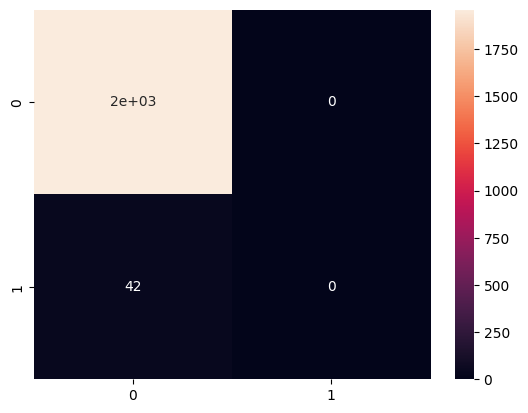

In [76]:
# 라이브러리 임포트
from sklearn.metrics import confusion_matrix

# y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화
lr_matrix = confusion_matrix(y_test, lr_pred)

# Scikit-learn의 classification_report를 활용하여 성능을 출력
sns.heatmap(lr_matrix, annot=True)

In [77]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1958
           1       0.00      0.00      0.00        42

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.96      0.98      0.97      2000



<br>
<font color=blue>8-3. DecisionTree 모델을 만들고 학습을 진행하세요. (단, max_depth는 10, random_state는 42로 설정)</font>

In [78]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

<br>
<font color=blue>8-4. RandomForest 모델을 만들고 학습을 진행하세요. (단, n_estimators=100, random_state=42 설정)</font>

In [79]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train_s, y_train)
dt_pred = model_dt.predict(x_test)

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1958
           1       0.00      0.00      0.00        42

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.96      0.98      0.97      2000



<Axes: >

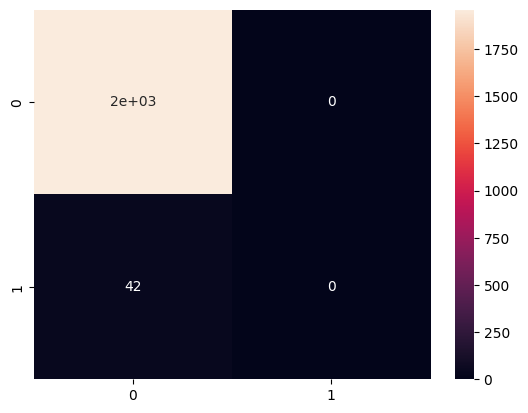

In [80]:
# y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화
rf_matrix = confusion_matrix(y_test, lr_pred)

# Scikit-learn의 classification_report를 활용하여 성능을 출력
sns.heatmap(rf_matrix, annot=True)

<br>
<font color=blue>8-5. XGBoost 모델을 만들고 학습을 진행하세요. (단, n_estimators=5 설정)</font>

In [82]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=5)

model_xgb.fit(x_train_s, y_train)
xgb_pred = model_xgb.predict(x_test)

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1958
           1       0.00      0.00      0.00        42

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.96      0.98      0.97      2000



<Axes: >

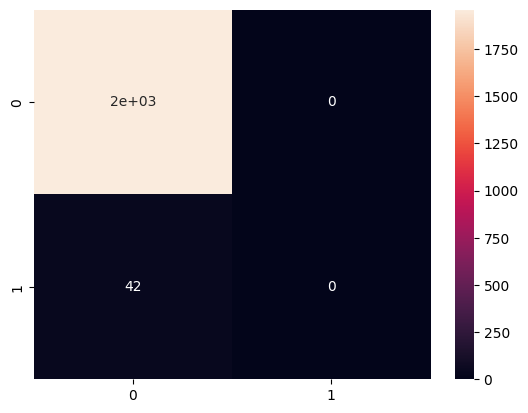

In [83]:
# y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화
xgb_matrix = confusion_matrix(y_test, lr_pred)

# Scikit-learn의 classification_report를 활용하여 성능을 출력
sns.heatmap(xgb_matrix, annot=True)

<br>
<font color=blue>8-6. Light GBM 모델을 만들고 학습을 진행하세요. (단, n_estimators=3 설정)</font>

In [84]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(n_estimators=3)

model_lgbm.fit(x_train, y_train)
lgbm_pred = model_lgbm.predict(x_test)

print(classification_report(y_test, lgbm_pred))

LightGBMError: ignored

In [ ]:
# y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화
lgbm_matrix = confusion_matrix(y_test, lr_pred)

# Scikit-learn의 classification_report를 활용하여 성능을 출력
sns.heatmap(lgbm_matrix, annot=True)

<br>
<font color=blue>8-7. Linear Regression 모델을 연습으로 만들고 학습을 진행하세요.</font>

In [86]:
# 이 데이터로 연습하세요.
x_data = np.array([1.6, 2.3, 3.5, 4.6]).reshape(-1,1)
y_data = np.array([3.3, 5.5, 7.2, 9.9])

In [87]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_data, y_data)
lr.score(x_data, y_data)
lr.predict([[5]])

array([10.64610266])

<br>

## **<span style="color:black">9. 딥러닝 모델링 & 모델 성능평가 및 그래프 출력</span>**

<br>
<font color=blue>9-1. 아래 가이드대로 해지여부를 분류하는 딥러닝 모델을 만드세요.</font>

+ 첫번째 Hidden Layer : unit 64 , activation='relu'
+ 두번째 Hidden Layer : unit 32 , activation='relu'
+ 세번째 Hidden Layer : unit 16 , activation='relu'
+ 각 Hidden Layer 마다 Dropout 0.2 비율로 되도록 하세요.
+ EarlyStopping 콜백을 적용하고 ModelCheckpoint 콜백으로 validation performance가 좋은 모델을 h5 모델로 저장하세요.

In [88]:
# 하이퍼파라미터 설정 : batch_size, epochs


In [89]:
# 모델 입력(features) 갯수 확인


In [90]:
x_train_s.shape[1]

37

In [91]:
# 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# Tensoflow의 Sequential() 함수 선언
# 결과 저장 : model
clear_session()
model = Sequential()

# model.add() 함수와 Dense() 함수 사용
# 첫번째 Hidden Layer 생성시 unit 64, activation='relu', input_shape=() 입력해야 함
# 첫번째 Hidden Layer 다음에 Dropout(0.2) 추가 

# 마지막 Dense에서 1개만 나오므로 'sigmoid' 설정하고 0.5 이하이면 정상, 아니면 해지

# compile

# EarlyStopping, ModelCheckpoint


# 모델 훈련


In [92]:
x_train_s.shape[1]

37

In [93]:
clear_session()

model = Sequential()

model.add(Input(shape=(x_train_s.shape[1])))

model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 37)                0         
                                                                 
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               3

In [94]:
es = EarlyStopping(monitor='val_accuracy',
                   min_delta=0,
                   patience=20,
                   verbose=1,
                   restore_best_weights=True)
hist1 = model.fit(x_train_s, y_train, epochs=100, batch_size=64, 
          validation_split=0.2, verbose =1,
          callbacks=[es]).history

Epoch 1/100
196/196 [==============================] - 5s 17ms/step - loss: 0.4891 - accuracy: 0.7594 - val_loss: 0.6174 - val_accuracy: 0.6231
Epoch 2/100
196/196 [==============================] - 3s 14ms/step - loss: 0.4431 - accuracy: 0.7888 - val_loss: 0.3670 - val_accuracy: 0.7944
Epoch 3/100
196/196 [==============================] - 2s 10ms/step - loss: 0.4205 - accuracy: 0.8003 - val_loss: 0.4721 - val_accuracy: 0.7321
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 0.4019 - accuracy: 0.8107 - val_loss: 0.4850 - val_accuracy: 0.7829
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 0.4001 - accuracy: 0.8128 - val_loss: 0.3242 - val_accuracy: 0.8226
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 0.3905 - accuracy: 0.8143 - val_loss: 0.3638 - val_accuracy: 0.8574
Epoch 7/100
196/196 [==============================] - 3s 15ms/step - loss: 0.3881 - accuracy: 0.8177 - val_loss: 0.3888 - val_accuracy:

In [95]:
model.evaluate(x_test_s, y_test, batch_size=64)

32/32 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8285


[0.3935069739818573, 0.828499972820282]

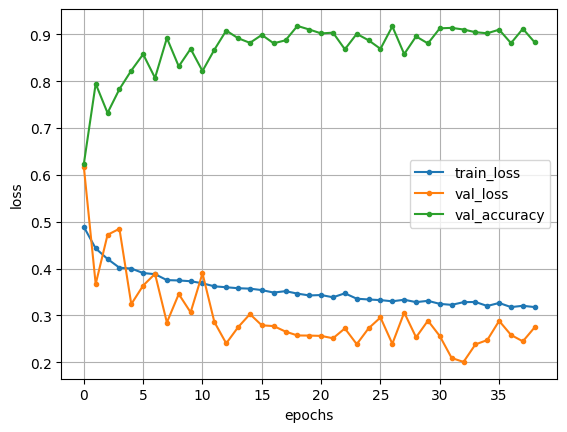

In [96]:
plt.plot(hist1['loss'], label = 'train_loss', marker = '.')
plt.plot(hist1['val_loss'], label = 'val_loss', marker = '.')
plt.plot(hist1['val_accuracy'], label = 'val_accuracy', marker = '.')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

<br>
<font color=blue>9-2. 다중 분류하는 딥러닝 모델을 만드세요.</font>

In [97]:
# y_train, y_test One-Hot-Encoding


In [98]:
# 딥러닝 모델
clear_session()

il = Input(shape=x_train_s.shape[1], batch_size=64)
hl = Dense(64, activation='relu')(il)
hl = Dense(256, activation='relu')(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dense(1024, activation='relu')(hl)
hl = Dense(32, activation='relu')(hl)
hl = Dense(16, activation='relu')(hl)
hl = Dense(1, activation='sigmoid')(hl)

model = keras.models.Model(il, hl)

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(64, 37)]                0         
                                                                 
 dense (Dense)               (64, 64)                  2432      
                                                                 
 dense_1 (Dense)             (64, 256)                 16640     
                                                                 
 dense_2 (Dense)             (64, 512)                 131584    
                                                                 
 dense_3 (Dense)             (64, 1024)                525312    
                                                                 
 dense_4 (Dense)             (64, 32)                  32800     
                                                                 
 dense_5 (Dense)             (64, 16)                  528   

In [99]:
es = EarlyStopping(monitor='val_accuracy',
                   min_delta=0,
                   patience=20,
                   verbose=1,
                   restore_best_weights=True)
hist2 = model.fit(x_train_s, y_train, epochs=100, batch_size=64, 
          validation_split=0.2, verbose =1,
          callbacks=[es]).history

Epoch 1/100
196/196 [==============================] - 5s 19ms/step - loss: 0.4023 - accuracy: 0.8115 - val_loss: 0.3602 - val_accuracy: 0.7951
Epoch 2/100
196/196 [==============================] - 5s 27ms/step - loss: 0.3165 - accuracy: 0.8569 - val_loss: 0.3211 - val_accuracy: 0.8673
Epoch 3/100
196/196 [==============================] - 3s 18ms/step - loss: 0.2887 - accuracy: 0.8727 - val_loss: 0.4538 - val_accuracy: 0.7967
Epoch 4/100
196/196 [==============================] - 4s 18ms/step - loss: 0.2691 - accuracy: 0.8830 - val_loss: 0.2853 - val_accuracy: 0.8625
Epoch 5/100
196/196 [==============================] - 4s 18ms/step - loss: 0.2574 - accuracy: 0.8880 - val_loss: 0.3101 - val_accuracy: 0.8437
Epoch 6/100
196/196 [==============================] - 5s 25ms/step - loss: 0.2406 - accuracy: 0.8977 - val_loss: 0.2947 - val_accuracy: 0.8728
Epoch 7/100
196/196 [==============================] - 4s 18ms/step - loss: 0.2306 - accuracy: 0.8983 - val_loss: 0.2646 - val_accuracy:

In [100]:
model.evaluate(x_test_s, y_test, batch_size=64)

32/32 [==============================] - 0s 7ms/step - loss: 0.4967 - accuracy: 0.9185


[0.49669817090034485, 0.9185000061988831]

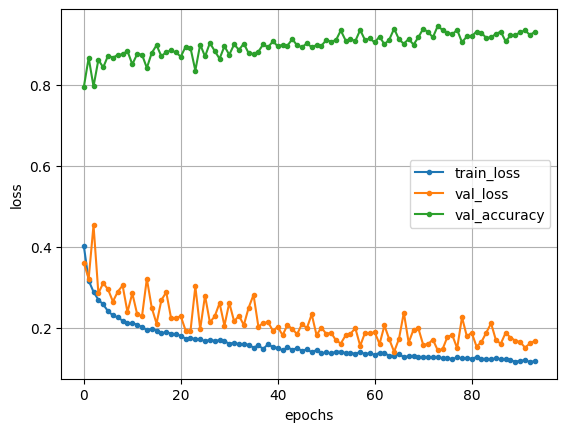

In [101]:
plt.plot(hist2['loss'], label = 'train_loss', marker = '.')
plt.plot(hist2['val_loss'], label = 'val_loss', marker = '.')
plt.plot(hist2['val_accuracy'], label = 'val_accuracy', marker = '.')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

In [102]:
# 참고
# Y 레이블 One-Hot-Encoding 되지 않았으면 loss='sparse_categorical_crossentropy' 사용
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

# 'sparse_categorical_crossentropy' 사용할 경우
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[es,mc], validation_data=(X_test, y_test), verbose=1)

<br>
<font color=blue>9-3. 모델 성능을 평가해서 그래프로 표현하세요. 학습 정확도와 검증정확도를 그래프로 표시하고 xlabel에는 Epochs, ylabel에는 Accuracy, 범례에는 Train과 Validation으로 표시하세요..</font>

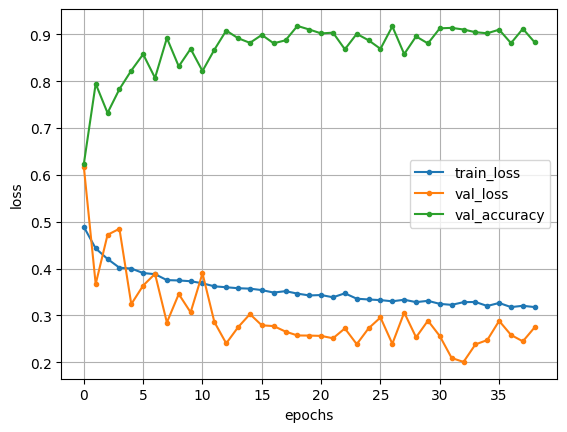

In [103]:
plt.plot(hist1['loss'], label = 'train_loss', marker = '.')
plt.plot(hist1['val_loss'], label = 'val_loss', marker = '.')
plt.plot(hist1['val_accuracy'], label = 'val_accuracy', marker = '.')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

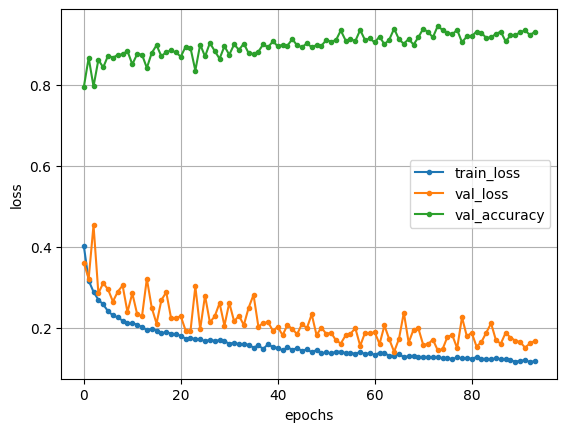

In [104]:
plt.plot(hist2['loss'], label = 'train_loss', marker = '.')
plt.plot(hist2['val_loss'], label = 'val_loss', marker = '.')
plt.plot(hist2['val_accuracy'], label = 'val_accuracy', marker = '.')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

<br>
<font color=blue>9-4. 모델 성능을 평가해서 그래프로 표현하세요. 학습 손실과 검증 손실을 그래프로 표시하고 xlabel에는 Epochs, ylabel에는 Loss, 범례에는 Train Loss와 Validation Loss로 표시하세요.</font>

<br>
<font color=blue>9-5. y값을 예측하여 y_test_pred에 저장하고 정확도를 출력하세요..</font>